In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Metrail_dataset.csv", header=None)


In [3]:
data.head(12)

,0,1
0,Month,Travellers('000)
1,Jan-91,1724
2,Feb-91,1638
3,Mar-91,1987
4,Apr-91,1825
5,May-91,NaN
6,Jun-91,1879
7,Jul-91,1957
8,Aug-91,2027
9,Sep-91,1609


In [74]:
data .columns =['Month', 'Passengers']

In [75]:
data.head()

,Month,Passengers
0,Month,Travellers('000)
1,Jan-91,1724
2,Feb-91,1638
3,Mar-91,1987
4,Apr-91,1825


In [76]:
data.head()

,Month,Passengers
0,Month,Travellers('000)
1,Jan-91,1724
2,Feb-91,1638
3,Mar-91,1987
4,Apr-91,1825


In [77]:
# Assuming 'data' is your existing DataFrame
# Drop the first row using its index (0 in this case)
data = data.drop(index=0)

In [78]:
data.head()

,Month,Passengers
1,Jan-91,1724
2,Feb-91,1638
3,Mar-91,1987
4,Apr-91,1825
5,May-91,NaN


In [79]:
data.isnull().sum()

Month          0
Passengers    11
dtype: int64

In [80]:
data.shape

(159, 2)

In [81]:
# Now convert 'Month' to datetime and set it as the index
data['Year'] = pd.to_datetime(data['Month'], format="%b-%y")
data.set_index('Year', inplace=True)

In [82]:
data.head()

,Month,Passengers
Year,,
1991-01-01,Jan-91,1724
1991-02-01,Feb-91,1638
1991-03-01,Mar-91,1987
1991-04-01,Apr-91,1825
1991-05-01,May-91,NaN


In [83]:
data['Passengers'] = pd.to_numeric(data['Passengers'], errors='coerce')


In [84]:
data.head()

,Month,Passengers
Year,,
1991-01-01,Jan-91,1724.0
1991-02-01,Feb-91,1638.0
1991-03-01,Mar-91,1987.0
1991-04-01,Apr-91,1825.0
1991-05-01,May-91,NaN


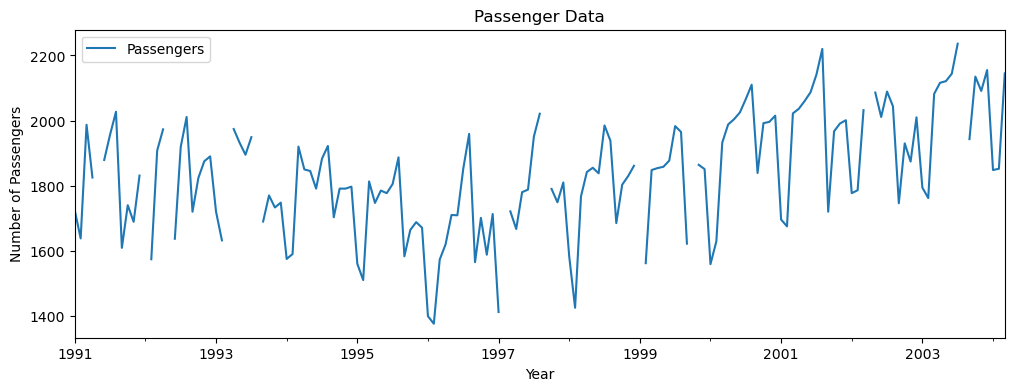

In [85]:
# Plotting the data
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Passenger Data')
plt.xlabel('Year')  # Label the x-axis as 'Year'
plt.ylabel('Number of Passengers')  # Label the y-axis as 'Number of Passengers'

# Display the plot
plt.show(block=False)

## Next observed value

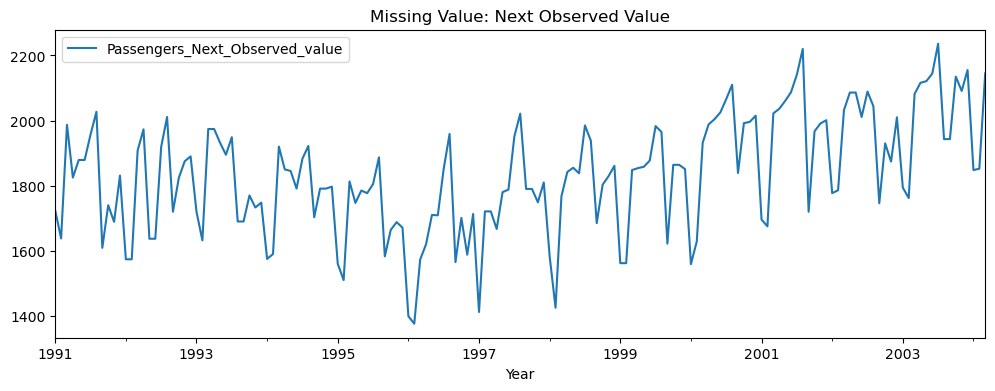

In [86]:
data = data.assign(Passengers_Next_Observed_value = data['Passengers'].fillna(method='bfill'))
data[['Passengers_Next_Observed_value']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Missing Value: Next Observed Value')
plt.show(block=False)


In [87]:
data.head(159)

,Month,Passengers,Passengers_Next_Observed_value
Year,,,
1991-01-01,Jan-91,1724.0,1724.0
1991-02-01,Feb-91,1638.0,1638.0
1991-03-01,Mar-91,1987.0,1987.0
1991-04-01,Apr-91,1825.0,1825.0
1991-05-01,May-91,NaN,1879.0
...,...,...,...
2003-11-01,Nov-03,2091.0,2091.0
2003-12-01,Dec-03,2155.0,2155.0
2004-01-01,Jan-04,1848.0,1848.0


In [89]:
mean_passengers_bfill = data['Passengers'].mean()
print(f"The mean number of passengers after imputation is: {mean_passengers_bfill}")


The mean number of passengers after imputation is: 1837.5472972972973


## Linear Interpolation

Text(0, 0.5, 'Number of Passengers')

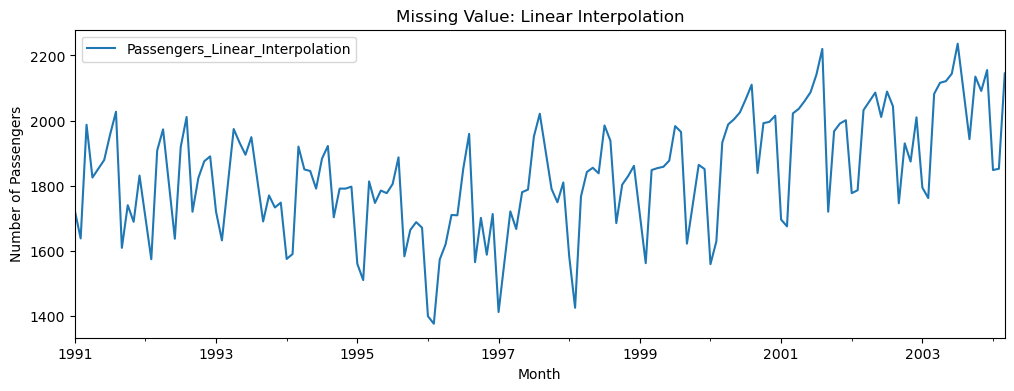

In [93]:
data = data.assign(Passengers_Linear_Interpolation=data['Passengers'].interpolate(method='linear'))

# Now you can plot the interpolated data using the correct column name
data[['Passengers_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Missing Value: Linear Interpolation')
plt.xlabel('Month')  # Assuming 'Month' is the index and you want it labeled
plt.ylabel('Number of Passengers')


,Month,Passengers,Passengers_Next_Observed_value,Passengers_Linear_Inpterpolation,Passengers_Linear_Interpolation
Year,,,,,


In [95]:
data.head()

,Month,Passengers,Passengers_Next_Observed_value,Passengers_Linear_Inpterpolation,Passengers_Linear_Interpolation
Year,,,,,
1991-01-01,Jan-91,1724.0,1724.0,1724.0,1724.0
1991-02-01,Feb-91,1638.0,1638.0,1638.0,1638.0
1991-03-01,Mar-91,1987.0,1987.0,1987.0,1987.0
1991-04-01,Apr-91,1825.0,1825.0,1825.0,1825.0
1991-05-01,May-91,NaN,1879.0,1852.0,1852.0


In [96]:
mean_passengers_linear = data['Passengers_Linear_Interpolation'].mean()
print(f"The mean number of passengers after imputation is: {mean_passengers_linear}")

The mean number of passengers after imputation is: 1836.566037735849


In [7]:
numbers = [1,2,8,20,15,25,24,32, 84]

In [8]:
for num in numbers:
    print(num)

1
2
8
20
15
25
24
32
84


In [9]:
largest_number = max(numbers)
print(largest_number)

84


In [10]:
second_largest = 0

for number in numbers:
    if number < largest_number and number >second_largest:
        second_largest = number

print(second_largest)
        

32


### Reversing an array

In [12]:
numbers = [1,2,3,4,5,6]


In [13]:
for i in numbers:
    print(i)

1
2
3
4
5
6


In [14]:
numbers = reversed(numbers)
for i in numbers:
    print(i)

6
5
4
3
2
1


In [16]:
list = [1,2,3,4,5,6]

In [18]:
reversed_lst = list[::-1]

In [19]:
for num in reversed_lst:
    print(num)

6
5
4
3
2
1
